In [457]:
import requests
import json
import pandas as pd

In [458]:
%matplotlib inline

### Percent of COVID-19 tests positive by date,
### from Ohio CDC data.  (outliers and null rejected)

In [459]:
state='OH'

<ipython-input-460-835104559509>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['percentPositive'] = df2['percentPositive'].abs()*100


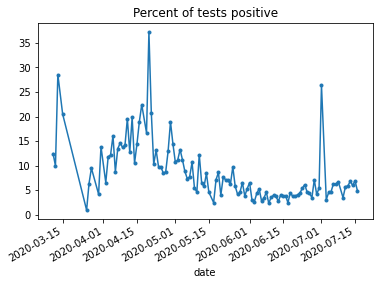

In [460]:
result = requests.get("https://covidtracking.com/api/states/daily")
data = json.loads(result.content)
df = pd.DataFrame([ d for d in data if d['state']==state])
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df = df.set_index('date')

df['percentPositive'] =  df.positiveIncrease / df.totalTestResultsIncrease

notNullorOneorZero =  ~df['percentPositive'].isnull() & (df['percentPositive']!=1) & (df['percentPositive']!=0)
notTooBig = ~(df['percentPositive'] > .5)

df2 = df[ notNullorOneorZero & notTooBig ] 

df2['percentPositive'] = df2['percentPositive'].abs()*100
#df_percent = df2.loc[:,'percentPositive']
a1 = df2.percentPositive.plot(marker='.',title='Percent of tests positive')
a1.figure.savefig('percent',dpi=100)

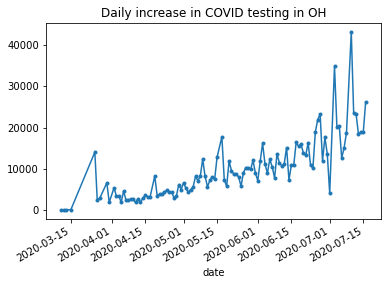

In [461]:
a2 = df2.totalTestResultsIncrease.plot(marker='.',title=f'Daily increase in COVID testing in {state}')
a2.figure.savefig('testing',dpi=100)

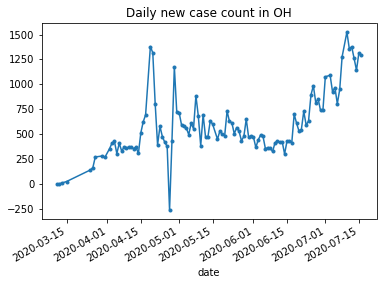

In [462]:
a3 = df2.positiveIncrease.plot(marker='.',title=f'Daily new case count in {state}')
a2.figure.savefig('new_cases',dpi=100)

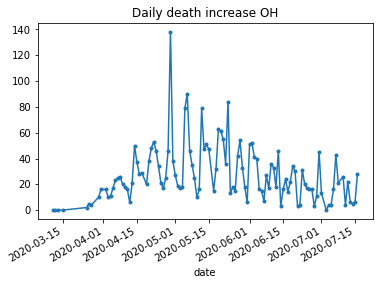

In [463]:
a4 = df2.deathIncrease.plot(marker='.',title=f'Daily death increase {state}')
a4.figure.savefig('daily_deaths',dpi=100)

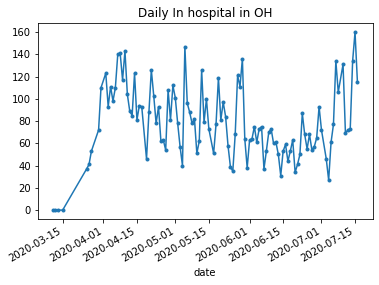

In [471]:
a4 = df2.hospitalizedIncrease.plot(marker='.',title=f'Daily In hospital in {state}')
a4.figure.savefig('in_hospital',dpi=100)

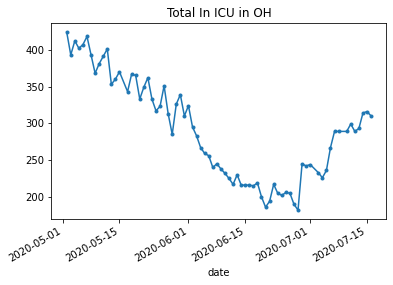

In [472]:
a4 = df2.inIcuCurrently.plot(marker='.',title=f'Total In ICU in {state}')
a4.figure.savefig('in_ICU',dpi=100)

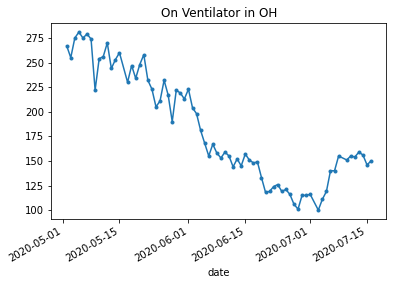

In [473]:
a4 = df2.onVentilatorCurrently.plot(marker='.',title=f'On Ventilator in {state}')
a4.figure.savefig('Total on Ventilator',dpi=100)

In [467]:
cols = ['totalTestResultsIncrease','positiveIncrease','percentPositive']
cols = ['percentPositive']
df3 = df2[cols]

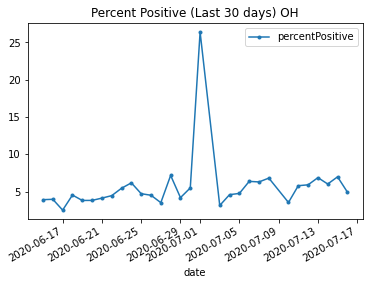

In [468]:
a6 = df3[:30].plot(marker='.',title=f'Percent Positive (Last 30 days) {state}')

In [469]:
df3.head(7)

,percentPositive
date,
2020-07-16,4.929308
2020-07-15,6.972555
2020-07-14,6.011159
2020-07-13,6.866322
2020-07-12,5.901246
2020-07-11,5.783153
2020-07-10,3.534101


In [470]:
df.head(10)

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,percentPositive
date,,,,,,,,,,,,,,,,,,,,,
2020-07-16,OH,70601,1018192,NaN,1024.0,9324.0,310.0,2280.0,150.0,None,...,28,115,4daacba77dd09426da0775fc2f0db72558a324df,0,0,0,0,0,,0.049293
2020-07-15,OH,69311,993312,NaN,1027.0,9209.0,316.0,2259.0,146.0,None,...,6,160,1538a377c3d2dc0fe47d4c2934287276cc160502,0,0,0,0,0,,0.069726
2020-07-14,OH,67995,975754,NaN,1017.0,9049.0,314.0,2223.0,156.0,None,...,5,134,8a6100e05bc68a3842eda51cb3954d04b8b5e9bb,0,0,0,0,0,,0.060112
2020-07-13,OH,66853,957898,NaN,949.0,8915.0,293.0,2201.0,159.0,None,...,6,73,663e3a96d6fe4027bf8efceb7a6b63bcdfe55870,0,0,0,0,0,,0.068663
2020-07-12,OH,65592,940794,NaN,954.0,8842.0,289.0,2185.0,154.0,None,...,22,72,d4f687d529a0e1e06582ada2de852bc68c67d531,0,0,0,0,0,,0.059012
2020-07-11,OH,64214,918821,NaN,928.0,8770.0,299.0,2169.0,155.0,None,...,4,69,0935f83f9e58eed8a18a6a18ee71294cd5885572,0,0,0,0,0,,0.057832
2020-07-10,OH,62856,896697,NaN,928.0,8701.0,289.0,2161.0,151.0,None,...,26,131,3ffa12ed4c79b329d98caf56c7a7f5a2cc2f515c,0,0,0,0,0,,0.035341
2020-07-09,OH,61331,855071,NaN,890.0,8570.0,289.0,2146.0,155.0,None,...,15,81,e0b40ff2a6c00eec78bfc568c72b0d93ac77456f,0,0,0,0,0,,1.000000
2020-07-08,OH,60181,855071,NaN,890.0,8489.0,289.0,2127.0,155.0,None,...,21,106,3d6f75a371b91d94e07fcac1b82070bdcf5c491d,0,0,0,0,0,,0.068045
